# 2022-11-28

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [3]:
# Importing data

df = pd.read_csv("./data/titanic.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check count of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Removing almost empty feature

df.drop(columns=["Cabin"], axis=1, inplace=True)

## EDA

In [10]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [42]:
# Filling missing age

df["Age"].fillna(df["Age"].mean(), inplace=True)

[]

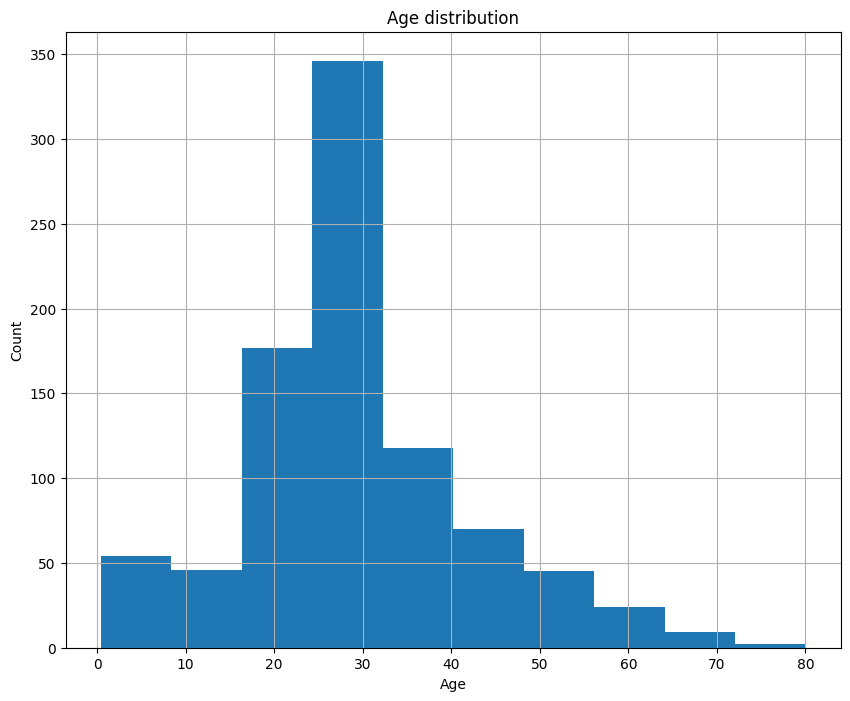

In [43]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
df[["Age"]].hist(ax=ax)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution")
plt.plot()

In [47]:
# Creating new age feature

df.loc[df["Age"] <= 14, "age_group"] = "child"
df.loc[(df["Age"] > 14) & (df["Age"] <= 55), "age_group"] = "adult"
df.loc[(df["Age"] > 55), "age_group"] = "elder"

In [48]:
df[["age_group", "Survived"]].groupby(["age_group"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,age_group,Survived
1,child,0.584416
0,adult,0.368217
2,elder,0.300000


In [49]:
# Checking how many boys vs girls survived
df.loc[df["age_group"] == "child"][["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.631579
1,male,0.538462


## Creating baseline

In [62]:
def person_survived(age_group: str, sex: str, pclass: int) -> int:
    if sex == "female" or pclass == 1 or age_group == "child":
        return 1
    return 0

prediction = df[["age_group", "Sex", "Pclass"]].apply(lambda x: person_survived(*x), axis=1)
true_label = df["Survived"]

print(classification_report(true_label, prediction))
print(f1_score(true_label, prediction))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       549
           1       0.63      0.87      0.73       342

    accuracy                           0.75       891
   macro avg       0.76      0.77      0.75       891
weighted avg       0.79      0.75      0.75       891

0.7272727272727273


## Continue EDA

In [74]:
df.groupby(["Parch"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked,is_child,is_adult,is_elder,age_class,age_group,had_parch,had_sibsp,is_alone
Parch,,,,,,,,,,,,,,,,,,
0,678,678,678,678,678,678,678,678,678,676,678,678,678,678,678,678,678,678
1,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
2,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [75]:
df.loc[df["age_group"] == "child"].groupby(["Parch"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked,is_child,is_adult,is_elder,age_class,age_group,had_parch,had_sibsp,is_alone
Parch,,,,,,,,,,,,,,,,,,
0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
2,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [76]:
df["had_parch"] = df["Parch"].apply(lambda x: int(x > 0))
df[["had_parch", "Survived"]].groupby(["had_parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,had_parch,Survived
1,1,0.511737
0,0,0.343658


In [77]:
df.groupby(["SibSp"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Embarked,is_child,is_adult,is_elder,age_class,age_group,had_parch,had_sibsp,is_alone
SibSp,,,,,,,,,,,,,,,,,,
0,608,608,608,608,608,608,608,608,608,606,608,608,608,608,608,608,608,608
1,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
2,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
3,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
4,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [80]:
df["had_sibsp"] = df["SibSp"].apply(lambda x: int(x > 0))
df[["had_sibsp", "Survived"]].groupby(["had_sibsp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,had_sibsp,Survived
1,1,0.466431
0,0,0.345395


In [81]:
df["is_alone"] = (df["SibSp"] + df["Parch"]).apply(lambda x: int(x == 0))
df[["is_alone", "Survived"]].groupby(["is_alone"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,is_alone,Survived
0,0,0.505650
1,1,0.303538


In [82]:
df["Name"].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [ ]:
def extract_name_info(full_name: str) -> str:
    sencod_half = full_name.split(",")[1]
    return sencod_half.split(".")[0].strip()

In [ ]:
extract_name_info("Williams, Mr. Charles Eugene")

In [89]:
df["name_info"] = df["Name"].apply(extract_name_info)

In [91]:
df.groupby(["name_info"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_child,is_adult,is_elder,age_class,age_group,had_parch,had_sibsp,is_alone
name_info,,,,,,,,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Don,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Dr,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Jonkheer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Miss,182,182,182,182,182,182,182,182,182,182,181,182,182,182,182,182,182,182,182


In [92]:
df[["name_info", "Survived"]].groupby(["name_info"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,name_info,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000
